# Dataset and Data Dictionary

The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.

The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

Pandas is one of the most popular open-source frameworks available for Python and is used for Data Analysis.Series and DataFrames are the dataobjects of Pandas.
Numpy is the arraybased library and is used for performing calculations and computations.
matplot lib is a visualiztion library for visualizing the various basic plots like bar,line,pier,scatter plot etc.
seaborn is based on the matplotlib and is bases on statistics analysis to summarize the data.
collection is a python container used to store the data.
Counter is imported from the collections and will count how many times equivalent values are added.Counter can be initialized in many ways.
sklearn is a machine learning library of pyhton.It supports both supervised and unsupervised machine learning.

Import the required libraries

In [9]:
!unrar X /content/telecom_churn_data.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/telecom_churn_data.rar


Would you like to replace the existing file telecom_churn_data.csv
79156935 bytes, modified on 2018-10-26 07:31
with a new one
79156935 bytes, modified on 2018-10-26 07:31

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

Program aborted


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve
from sklearn.decomposition import PCA

%matplotlib inline
RANDOM_STATE = 42

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LOADING DATASET

The pandas function read_csv() reads in values, where the delimiter is a comma character.
This will convert the dataset into dataframe(object of pandas).

In [4]:
data=pd.read_csv('telecom_churn_data.csv')
#for transpose the datset ,we use .T
data.head().T


,0,1,2,3,4
mobile_number,7000842753,7001865778,7001625959,7001204172,7000142493
circle_id,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
aon,968,1006,1103,2491,1526
aug_vbc_3g,30.4,0.0,0.0,0.0,0.0
jul_vbc_3g,0.0,0.0,0.0,0.0,0.0
jun_vbc_3g,101.2,0.0,4.17,0.0,0.0


# EDA(EXPLORATORY DATA ANALYSIS)

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. 
These patterns include outliers and features of the data that might be unexpected.

EDA is an important first step in any data analysis. Understanding where outliers occur and how variables are related can 
help one design statistical analyses that yield meaningful results.

In [5]:
data.shape

(99999, 226)

There is 99,999 rows and 226 columns present in the original datasets

In Python, the NumPy sum() function is used for computing the summation of the total number of items present in the given array.
The numPy.where() function is used to locate where exactly is the element with the specified conditions positioned in the array which has been entered. This can be done by using both single argument as well as specifying multiple arguments.
np.where(condition)-->It return array of indices of the elements which satisfied the condition.


In [6]:
#we are classifying on the bases of sept month
churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
data['churn'] = np.where(data[churn_cols].sum(axis=1)==0,1,0)
#if these 4 columns sum is zero then churn will be done i.e.1 and if sum is not zero then churning will not be done i.e.0

data.drop() function Remove rows or columns by specifying label names and corresponding axis, or by specifying directly 
index or column names. When using a multi-index, labels on different levels can be removed by specifying the level.It returns
dataframe after dropping.
axis parameter is used to specify whether to drop specific label or columns.axis=1 is used for columns and axis=0 is for labels.
str.contains()-->This methid Test if pattern or regex is contained within a string of a Series or Index.It Return boolean Series or Index based on whether a given pattern or regex is contained within a string of a Series or Index.

In [7]:
regex_str='_9|sep'
data=data.drop(data.columns[data.columns.str.contains(regex_str)],axis=1)

In [8]:
data.shape

(99999, 172)

In [9]:
data

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,...,0,0,NaN,1.0,1.0,1006,0.00,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,167.690,189.058,...,0,0,NaN,NaN,NaN,1103,0.00,0.00,4.17,0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,221.338,251.102,...,0,0,NaN,NaN,NaN,2491,0.00,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,261.636,309.876,...,0,0,0.0,NaN,NaN,1526,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,18.471,69.161,...,0,0,NaN,NaN,NaN,3199,0.00,0.00,0.00,0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,112.201,77.811,...,0,0,NaN,NaN,NaN,2052,0.00,0.00,0.00,0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,229.187,0.000,...,0,0,1.0,NaN,NaN,185,0.00,0.00,0.00,1
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,322.991,303.386,...,0,0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0


In [10]:
# Get the unique count
for col in data.columns:
    print(col, len(data[col].unique()))

mobile_number 99999
circle_id 1
loc_og_t2o_mou 2
std_og_t2o_mou 2
loc_ic_t2o_mou 2
last_date_of_month_6 1
last_date_of_month_7 2
last_date_of_month_8 2
arpu_6 85681
arpu_7 85308
arpu_8 83615
onnet_mou_6 24314
onnet_mou_7 24337
onnet_mou_8 24090
offnet_mou_6 31141
offnet_mou_7 31024
offnet_mou_8 30909
roam_ic_mou_6 6513
roam_ic_mou_7 5231
roam_ic_mou_8 5316
roam_og_mou_6 8039
roam_og_mou_7 6640
roam_og_mou_8 6505
loc_og_t2t_mou_6 13540
loc_og_t2t_mou_7 13412
loc_og_t2t_mou_8 13337
loc_og_t2m_mou_6 20906
loc_og_t2m_mou_7 20638
loc_og_t2m_mou_8 20545
loc_og_t2f_mou_6 3861
loc_og_t2f_mou_7 3864
loc_og_t2f_mou_8 3808
loc_og_t2c_mou_6 2236
loc_og_t2c_mou_7 2427
loc_og_t2c_mou_8 2517
loc_og_mou_6 26373
loc_og_mou_7 26092
loc_og_mou_8 25991
std_og_t2t_mou_6 18245
std_og_t2t_mou_7 18568
std_og_t2t_mou_8 18292
std_og_t2m_mou_6 19735
std_og_t2m_mou_7 20019
std_og_t2m_mou_8 19787
std_og_t2f_mou_6 2451
std_og_t2f_mou_7 2392
std_og_t2f_mou_8 2334
std_og_t2c_mou_6 2
std_og_t2c_mou_7 2
std_og_t2c_mou_

In [11]:
data[['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',\
           'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',\
           'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']].head(5)

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
1,7001865778,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7001625959,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7001204172,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7000142493,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


These columns dono effect the dataset too much thats we are dropping the columns

In [12]:
# Remove unwanted columns
data.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',\
           'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',\
           'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1, inplace=True)

In [13]:
data.shape

(99999, 158)

select_dtypes() Return a subset of the DataFrame’s columns based on the column dtypes.

In [14]:
data.select_dtypes(include="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_6       98392 non-null  object
 1   date_of_last_rech_7       98232 non-null  object
 2   date_of_last_rech_8       96377 non-null  object
 3   date_of_last_rech_data_6  25153 non-null  object
 4   date_of_last_rech_data_7  25571 non-null  object
 5   date_of_last_rech_data_8  26339 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


to check columns having object datatypes 
12 columns haviing object datatype


only date columns having object datatypes

In [15]:
data.select_dtypes(exclude="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 152 entries, arpu_6 to churn
dtypes: float64(126), int64(26)
memory usage: 116.0 MB


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 158 entries, arpu_6 to churn
dtypes: float64(126), int64(26), object(6)
memory usage: 120.5+ MB


In [17]:
X=data.drop("churn",axis=1)
Y=data["churn"]

# UNIVARIANT ANALYSIS

Pandas Series.value_counts() function return a Series containing counts of unique values. The resulting object will be in 
descending order so that the first element is the most frequently-occurring element. 
Excludes NA values by default.

In [18]:
Y.value_counts()
#churn count

0    89808
1    10191
Name: churn, dtype: int64

countplot Show the counts of observations in each categorical bin using bars.

for nominal categorical column ,we can plot the CountPlot PieChart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


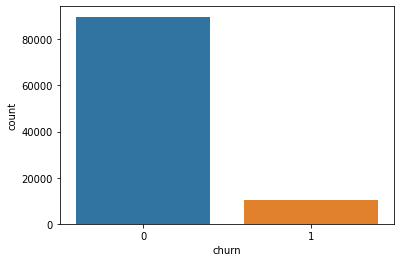

In [19]:
sns.countplot(data["churn"])

# CATEGORICAL COLUMNS(NOMINAL CATEGORICAL)

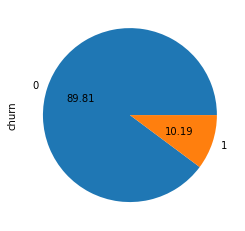

In [20]:
data['churn'].value_counts().plot(kind='pie',autopct='%.2f')
#autopct is used to show the percentage till 2 decimal places

Approximately 10% customers get churned.

# NUMERICAL COLUMNS

In [21]:
aon=pd.DataFrame(data['aon'])
aon

,aon
0,968
1,1006
2,1103
3,2491
4,1526
...,...
99994,3199
99995,2052
99996,185
99997,478


in univarinat analysis,in numerical columns
we can draw histogram,dist plot ect.

(array([35708., 20096., 12559.,  7111.,  4849.,  7794.,  5973.,  3926.,
         1904.,    79.]),
 array([ 180. ,  595.7, 1011.4, 1427.1, 1842.8, 2258.5, 2674.2, 3089.9,
        3505.6, 3921.3, 4337. ]),
 <a list of 10 Patch objects>)

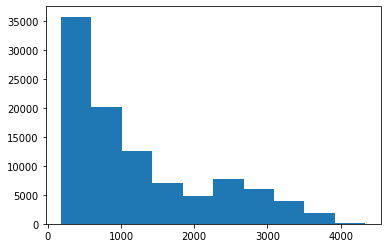

In [22]:
#histogram for aon 
plt.hist(data['aon'])


from the histogram,we can say that age on network is positively skewed.


subplots() helps in creating common layouts of subplots, including the enclosing figure object, in a single call.
Plt.subplots(nrows, ncols)
Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. We use seaborn in combination with matplotlib, the Python plotting module.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


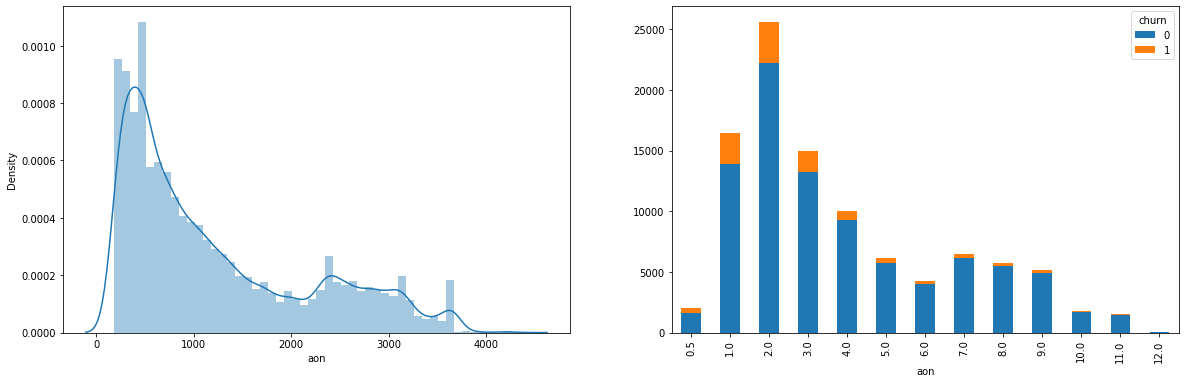

In [23]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(data['aon'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#sns.countplot(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), ax =ax1)
pd.crosstab(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), data['churn']).plot(kind='bar', stacked=True, ax = ax2)

As shown through distplot(shows distribution of data) ,data is positively skewed.
Pandas dataframe.isna() function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA.

# HANDLING MISSING VALUES

In [24]:
data.isna().mean()*100
#to find the null values percentage

arpu_6         0.000000
arpu_7         0.000000
arpu_8         0.000000
onnet_mou_6    3.937039
onnet_mou_7    3.859039
                 ...   
aon            0.000000
aug_vbc_3g     0.000000
jul_vbc_3g     0.000000
jun_vbc_3g     0.000000
churn          0.000000
Length: 158, dtype: float64

if null values for any columns are less than 5% then we can use dropna() i.e. complete case analysis
but here in this dataset ,in various columns,missing values are more than 10%
Hence we can not drop the na values.

The any() method returns one value for each column, True if ANY value in that column is True, otherwise False.
any() does a logical OR operation on a row or column of a DataFrame and returns the resultant Boolean value.

In [25]:
def get_cols_split(df):

    col_len = len(df.columns)

    jun_cols = []
    jul_cols = []
    aug_cols = []
    sep_cols = []
    common_cols = []
    date_cols = []
    
    for i in range(0, col_len):
        if any(pd.Series(df.columns[i]).str.contains('_6|jun')):
            jun_cols.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_7|jul')):
            jul_cols.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_8|aug')):
            aug_cols.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_9|sep')):
            sep_cols.append(df.columns[i])
        else:
            common_cols.append(df.columns[i])
        
        if any(pd.Series(df.columns[i]).str.contains('date')):
            date_cols.append(df.columns[i])
            
    return jun_cols,jul_cols,aug_cols,sep_cols,common_cols,date_cols

In [26]:
def get_cols_sub_split(col_list):
    call_usage_cols = []
    recharge_cols = []
    ic_usage_cols = []
    og_usage_cols = []

    call_usage_search_for = ['og','ic','mou']

    for i in range(0, len(col_list)):
        if any(pd.Series(col_list[i]).str.contains('|'.join(['rech','rch']))):
            recharge_cols.append(col_list[i])
        elif any(pd.Series(col_list[i]).str.contains('|'.join(call_usage_search_for))):
            call_usage_cols.append(col_list[i])

        if any(pd.Series(col_list[i]).str.contains('ic')):
            ic_usage_cols.append(col_list[i])
        elif any(pd.Series(col_list[i]).str.contains('og')):
            og_usage_cols.append(col_list[i])
            
    return call_usage_cols,recharge_cols,ic_usage_cols,og_usage_cols       

Pandas unique () function extracts a unique data from the dataset. 
The unique () method does not take any parameter and returns the numpy array of unique values
in that particular column.

In [27]:
data['fb_user_6'].unique()
data['fb_user_7'].unique()
data['fb_user_8'].unique()
data['night_pck_user_6'].unique()
data['night_pck_user_7'].unique()
data['night_pck_user_8'].unique()

array([ 0., nan,  1.])

As we have seen above that missing values are not randomly distributed .Hence we can not do the mean,median imputation or css
We can prefer arbitarary imputation

categorical missing values

default value of inplace parameter is false.
Pandas Series.value_counts() function return a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
The sort_values() method sorts the DataFrame by the specified label.
The fillna () method replaces the NULL values with a specified value. The fillna () method returns a new DataFrame object unless the inplace parameter is set to True, in that case the fillna () method does the replacing in the original DataFrame instead.

Text(0, 0.5, 'no. of customers')

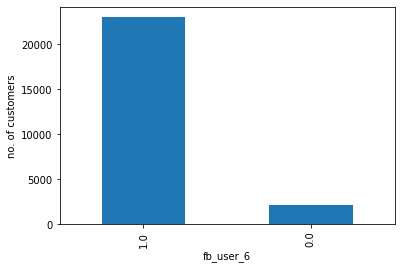

In [28]:
data['fb_user_6'].value_counts().sort_values(ascending=False).plot.bar()
#X_train['fb_user_7'].value_counts().sort_values(ascending=False).plot.bar()
data['fb_user_6'].fillna(2, inplace=True)
plt.xlabel('fb_user_6')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

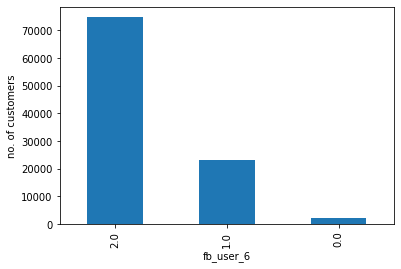

In [29]:
data['fb_user_6'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('fb_user_6')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

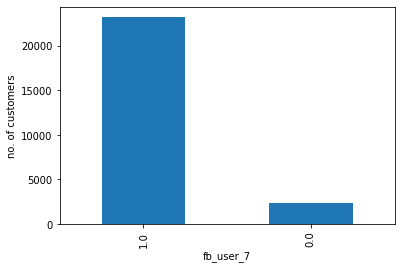

In [30]:
data['fb_user_7'].value_counts().sort_values(ascending=False).plot.bar()
data['fb_user_7'].fillna(2, inplace=True)
plt.xlabel('fb_user_7')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

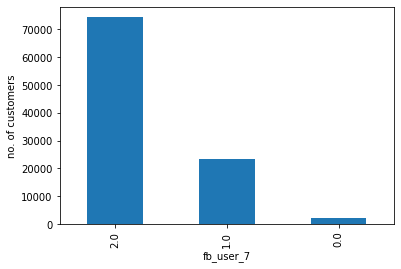

In [31]:
data['fb_user_7'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('fb_user_7')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

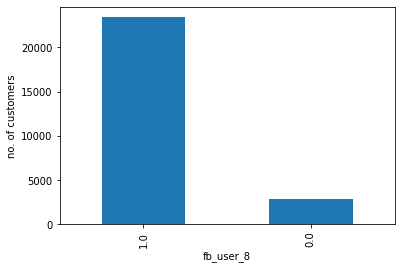

In [32]:
data['fb_user_8'].value_counts().sort_values(ascending=False).plot.bar()
data['fb_user_8'].fillna(2, inplace=True)
plt.xlabel('fb_user_8')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

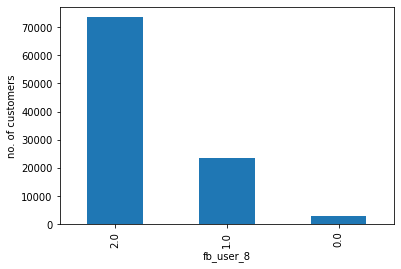

In [33]:
data['fb_user_8'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('fb_user_8')
plt.ylabel('no. of customers')

In the fb_users,missing values are filled with 2 and is more than 50k

Text(0, 0.5, 'no. of customers')

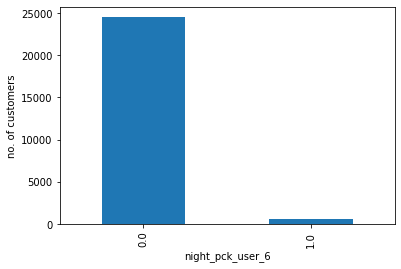

In [34]:
data['night_pck_user_6'].value_counts().sort_values(ascending=False).plot.bar()
data['night_pck_user_6'].fillna(2, inplace=True)
plt.xlabel('night_pck_user_6')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

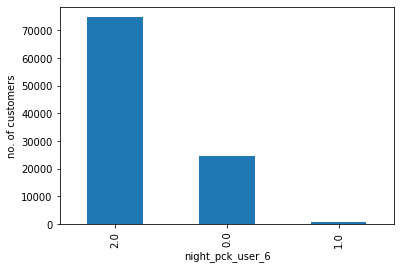

In [35]:
data['night_pck_user_6'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('night_pck_user_6')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

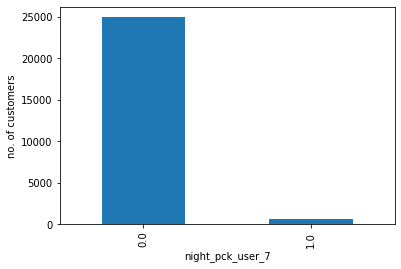

In [36]:
data['night_pck_user_7'].value_counts().sort_values(ascending=False).plot.bar()
data['night_pck_user_7'].fillna(2, inplace=True)
plt.xlabel('night_pck_user_7')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

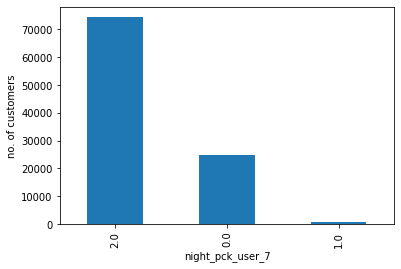

In [37]:
data['night_pck_user_7'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('night_pck_user_7')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

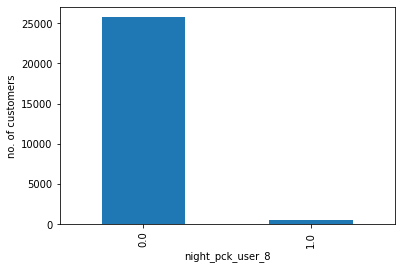

In [38]:
data['night_pck_user_8'].value_counts().sort_values(ascending=False).plot.bar()
data['night_pck_user_8'].fillna(2, inplace=True)
plt.xlabel('night_pck_user_8')
plt.ylabel('no. of customers')

Text(0, 0.5, 'no. of customers')

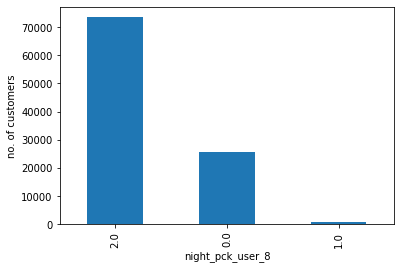

In [39]:
data['night_pck_user_8'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('night_pck_user_8')
plt.ylabel('no. of customers')

In the night pack user,missing values are filled with 2 value and is more than 50k

# NUMERICAL COLUMNS IMPUTATION

In [40]:
# Get the columns split to months
jun_cols, jul_cols, aug_cols, sep_cols, common_cols, date_cols = get_cols_split(data)

In [41]:
jun_call_usage_cols, jun_recharge_cols, jun_ic_usage_cols, jun_og_usage_cols = get_cols_sub_split(jun_cols)
jul_call_usage_cols, jul_recharge_cols, jul_ic_usage_cols, jul_og_usage_cols = get_cols_sub_split(jul_cols)
aug_call_usage_cols, aug_recharge_cols, aug_ic_usage_cols, aug_og_usage_cols = get_cols_sub_split(aug_cols)

In [42]:
cols_6 = ['count_rech_3g_6','max_rech_data_6','av_rech_amt_data_6','arpu_3g_6','total_rech_data_6','count_rech_2g_6','arpu_2g_6']
cols_7 = ['count_rech_3g_7','max_rech_data_7','av_rech_amt_data_7','arpu_3g_7','total_rech_data_7','count_rech_2g_7','arpu_2g_7']
cols_8 = ['count_rech_3g_8','max_rech_data_8','av_rech_amt_data_8','arpu_3g_8','total_rech_data_8','count_rech_2g_8','arpu_2g_8']

data[cols_6] = data[cols_6].fillna(0)
data[cols_7] = data[cols_7].fillna(0)
data[cols_8] = data[cols_8].fillna(0)

In [43]:
data[jun_call_usage_cols] = data[jun_call_usage_cols].fillna(0)
data[jul_call_usage_cols] = data[jul_call_usage_cols].fillna(0)
data[aug_call_usage_cols] = data[aug_call_usage_cols].fillna(0)

The pandas isnull () function is used for detecting missing values in an array-like object. 
obj – This is the object which is passed to the function for finding missing values in it. 
The result of this function is a boolean value. 
Based on the input provided, the boolean result is obtained.

In [44]:
data_missing = data.isnull().sum().reset_index(name='missing_cnt')
data_missing.loc[data_missing['missing_cnt']>0].sort_values('missing_cnt', ascending=False)

,index,missing_cnt
105,date_of_last_rech_data_6,74846
106,date_of_last_rech_data_7,74428
107,date_of_last_rech_data_8,73660
101,date_of_last_rech_8,3622
100,date_of_last_rech_7,1767
99,date_of_last_rech_6,1607


We have filled all the normal column missing values with zero and date columns are remaining.

# OUTLIER DETECTION

when data values are not in the given range where maximum data lies then tese data values are said as outliers.
These outliers can be treated by z-score method,IQR method or by percentile based method.
Z-score method is applicable for normal distributed data only.BUt our data is right skewed.Hence we can Use IQR method or Box plot to detect the outliers.

PLOTS OF OUTLIERS FOR INCOMING CALLS

In [45]:
cols = [['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6'],
        ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7'],
        ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','roam_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8']]

describe() method is used for statistical analysis.
melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.
melt function returns unpivoted dataframe.
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set. This function is useful to massage a DataFrame into a format where one or more columns are identifier variables ( id_vars ), while all other columns, considered measured variables ( value_vars ), are “unpivoted” to the row axis, leaving just two non-identifier.

,loc_ic_mou_6,std_ic_mou_6,isd_ic_mou_6,roam_ic_mou_6,spl_ic_mou_6,ic_others_6,total_ic_mou_6
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,160.896870,31.179327,7.166881,9.558277,0.059133,0.821007,200.130037
std,251.192138,104.361211,58.553452,71.403643,0.158174,11.718638,291.651671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.680000,0.000000,0.000000,0.000000,0.000000,0.000000,38.530000
50%,86.040000,5.010000,0.000000,0.000000,0.000000,0.000000,114.740000
75%,200.580000,25.410000,0.000000,0.000000,0.000000,0.000000,251.670000
max,7454.630000,5712.110000,6789.410000,13724.380000,19.760000,1362.940000,7716.140000


,loc_ic_mou_7,std_ic_mou_7,isd_ic_mou_7,roam_ic_mou_7,spl_ic_mou_7,ic_others_7,total_ic_mou_7
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,161.247178,32.580088,8.013288,6.873981,0.032289,0.973870,202.853055
std,253.318185,111.695196,63.969156,72.029965,0.152828,12.427693,298.124954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.710000,0.000000,0.000000,0.000000,0.000000,0.000000,41.190000
50%,86.610000,5.060000,0.000000,0.000000,0.000000,0.000000,116.340000
75%,198.690000,26.640000,0.000000,0.000000,0.000000,0.000000,250.660000
max,9669.910000,6745.760000,5289.540000,15371.040000,21.330000,1495.940000,9699.010000


,loc_ic_mou_8,std_ic_mou_8,isd_ic_mou_8,roam_ic_mou_8,spl_ic_mou_8,ic_others_8,total_ic_mou_8
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,158.427961,31.371656,7.987986,6.900761,0.038191,0.918590,198.750783
std,246.124674,107.385484,62.102622,66.558003,0.142454,12.924043,289.321094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.590000,0.000000,0.000000,0.000000,0.000000,0.000000,38.290000
50%,84.990000,4.690000,0.000000,0.000000,0.000000,0.000000,114.660000
75%,197.540000,25.510000,0.000000,0.000000,0.000000,0.000000,248.990000
max,10830.160000,5957.140000,4127.010000,13095.360000,16.860000,2327.510000,10830.380000


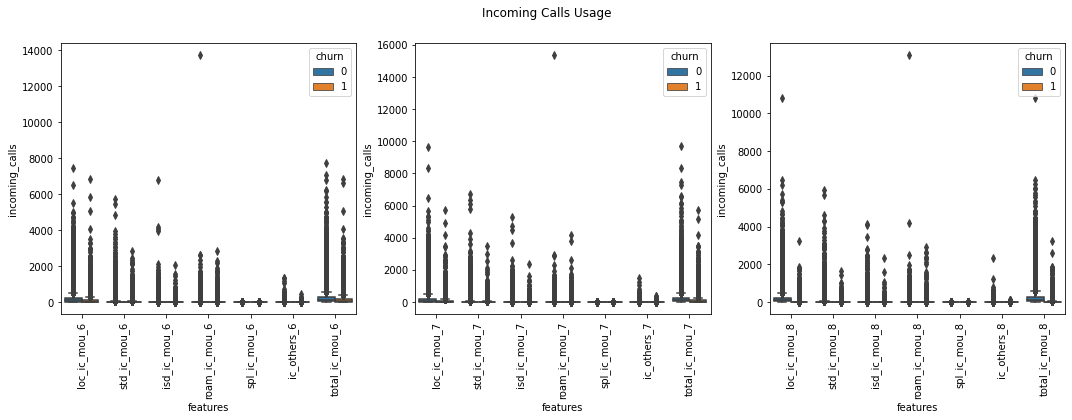

In [46]:
# plot for the incoming calls usage
plt.figure(figsize=(18, 5))
for i in range(0,3):
    display(data[cols[i]].describe())
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([data[cols[i]], data['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="features",value_name='incoming_calls')
    sns.boxplot(x="features", y="incoming_calls", hue="churn", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Incoming Calls Usage')

outlier is at the top percetile

PLOT OF OUTLIERS FOR OUTGOING CALLS

,loc_og_mou_6,std_og_mou_6,isd_og_mou_6,roam_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,138.523918,161.636708,0.766849,13.363643,3.762604,0.436277,305.133424
std,248.334416,383.593393,25.253433,70.074931,14.659270,4.044839,463.419481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.930000,0.000000,0.000000,0.000000,0.000000,0.000000,44.740000
50%,59.910000,9.180000,0.000000,0.000000,0.000000,0.000000,145.140000
75%,161.920000,132.490000,0.000000,0.000000,2.180000,0.000000,372.860000
max,10643.380000,8432.990000,5900.660000,3775.110000,1023.210000,800.890000,10674.030000


,loc_og_mou_7,std_og_mou_7,isd_og_mou_7,roam_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,136.203358,168.459573,0.746604,9.439823,4.786165,0.029069,310.231175
std,245.406396,402.372971,25.104616,57.347933,20.281655,2.119603,480.031178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.480000,0.000000,0.000000,0.000000,0.000000,0.000000,43.010000
50%,58.860000,8.610000,0.000000,0.000000,0.000000,0.000000,141.530000
75%,157.970000,136.900000,0.000000,0.000000,3.380000,0.000000,378.570000
max,7674.780000,10936.730000,5490.280000,2812.040000,2372.510000,370.130000,11365.310000


,loc_og_mou_8,std_og_mou_8,isd_og_mou_8,roam_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,133.727502,164.823386,0.748693,9.435597,4.781974,0.031577,304.119513
std,241.325369,402.334570,24.848715,62.989180,17.405718,2.260134,478.150031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.410000,0.000000,0.000000,0.000000,0.000000,0.000000,38.580000
50%,56.840000,7.250000,0.000000,0.000000,0.000000,0.000000,138.610000
75%,156.985000,129.415000,0.000000,0.000000,3.540000,0.000000,369.900000
max,11039.910000,13980.060000,5681.540000,5337.040000,1390.880000,394.930000,14043.060000


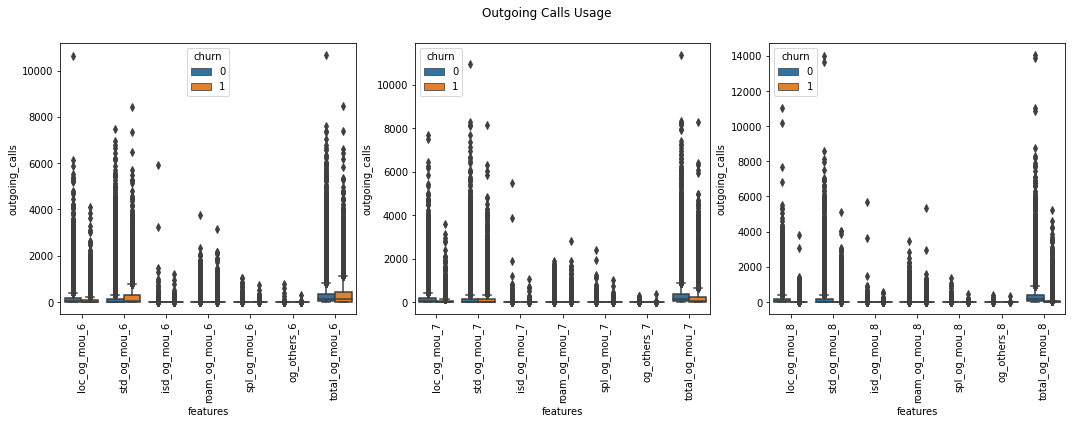

In [47]:
cols = [['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','roam_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6'],
        ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','roam_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7'],
        ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','roam_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']]


# plot for the outgoing calls usage
plt.figure(figsize=(18, 5))
#ic call usage
for i in range(0,3):
    display(data[cols[i]].describe())
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([data[cols[i]], data['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="features",value_name='outgoing_calls')
    sns.boxplot(x="features", y="outgoing_calls", hue="churn", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Outgoing Calls Usage')

outgoing call also have outliers at the the top percentile

OPERATORWISE CALLS USAGE

,onnet_mou_6,offnet_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,127.183397,190.142776,46.035643,103.244291,11.608541,9.198983,19.906397,2.071499
std,292.433718,312.928229,137.785270,169.592626,39.412899,53.282903,79.289474,16.173049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.430000,28.760000,2.060000,13.810000,0.000000,0.000000,0.000000,0.000000
50%,30.980000,89.680000,14.190000,52.360000,0.680000,0.000000,1.590000,0.000000
75%,112.610000,222.535000,44.690000,127.600000,7.530000,3.630000,13.980000,0.000000
max,7376.710000,8362.360000,6626.930000,4693.860000,1872.340000,5459.560000,5647.160000,1351.110000


,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,45.246387,89.667174,3.603334,1.078841,76.686937,83.862603,1.084561
std,148.140370,160.573349,13.966557,5.345068,247.943052,251.109975,7.829284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.990000,7.290000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.680000,37.690000,0.000000,0.000000,0.000000,2.890000,0.000000
75%,38.820000,105.780000,1.860000,0.000000,26.910000,48.790000,0.000000
max,6431.330000,4729.740000,1466.030000,342.860000,7366.580000,8314.760000,628.560000


,onnet_mou_7,offnet_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,128.512397,189.441086,46.138548,102.986672,12.113470,9.625541,20.820685,2.131371
std,303.869995,321.759659,143.252760,167.398842,42.209845,56.326309,84.937998,16.139100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.880000,26.650000,2.310000,14.990000,0.000000,0.000000,0.000000,0.000000
50%,29.230000,85.440000,14.330000,53.280000,0.730000,0.000000,1.600000,0.000000
75%,108.880000,217.830000,43.880000,126.680000,7.660000,3.780000,14.740000,0.000000
max,8157.780000,9667.130000,9324.660000,4455.830000,1983.010000,5800.930000,6141.880000,1136.080000


,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,44.679599,87.870081,3.646613,1.315689,80.085034,87.299970,1.071982
std,152.555137,155.423787,14.006097,7.391356,258.991617,264.678142,8.434579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.490000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.430000,37.230000,0.000000,0.000000,0.000000,2.580000,0.000000
75%,37.890000,103.360000,1.890000,0.000000,27.255000,49.330000,0.000000
max,7400.660000,4557.140000,1196.430000,916.240000,8133.660000,9284.740000,544.630000


,onnet_mou_8,offnet_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,125.864313,186.002904,44.672310,102.627450,11.119814,9.352359,20.043967,1.972872
std,302.023240,321.325854,133.922257,166.899871,38.150956,53.618152,81.542312,15.388684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.090000,23.840000,2.000000,13.810000,0.000000,0.000000,0.000000,0.000000
50%,28.040000,83.130000,14.010000,52.680000,0.660000,0.000000,1.430000,0.000000
75%,106.740000,215.500000,43.540000,127.200000,7.260000,3.440000,13.960000,0.000000
max,10752.560000,14007.340000,10696.230000,6274.190000,2433.060000,4309.290000,5645.860000,1394.890000


,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,43.419935,86.820488,3.480186,1.356709,78.803686,85.006833,1.010365
std,147.427075,153.669894,12.935836,6.606329,258.930848,265.124794,7.694209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.760000,6.310000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.030000,35.890000,0.000000,0.000000,0.000000,2.030000,0.000000
75%,37.360000,102.960000,1.780000,0.000000,25.040000,45.980000,0.000000
max,10752.560000,4961.330000,928.490000,502.090000,8014.430000,13950.040000,516.910000


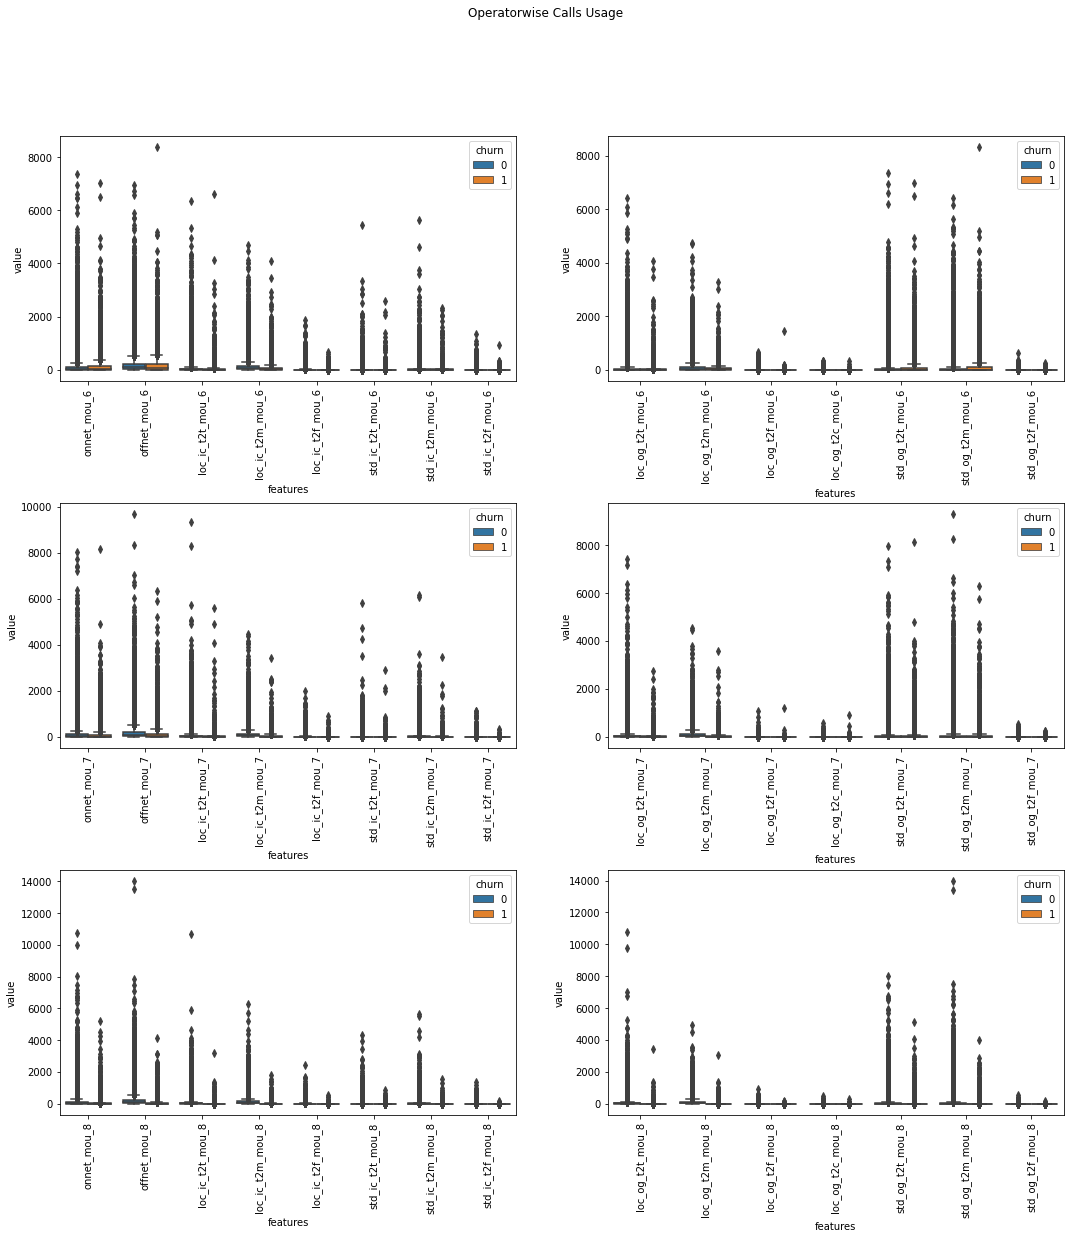

In [48]:
cols = [['onnet_mou_6','offnet_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'],
        ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6'],
        ['onnet_mou_7','offnet_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],
        ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7'],
        ['onnet_mou_8','offnet_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],
        ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8']]

# column description stats
for i in range(0,6):
    display(data[cols[i]].describe())

# plot for the operatorwise calls usage
plt.figure(figsize=(18, 18))
plt.subplots_adjust(hspace=0.5)
for i in range(0,6):
    plt.subplot(3,2,i+1)
    X = pd.concat([data[cols[i]], data['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Operatorwise Calls Usage')


,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,99999.000000,99999.000000,99999.000000
mean,327.514615,322.962970,324.157122
std,398.019701,408.114237,416.540455
min,0.000000,0.000000,0.000000
25%,109.000000,100.000000,90.000000
50%,230.000000,220.000000,225.000000
75%,437.500000,428.000000,434.500000
max,35190.000000,40335.000000,45320.000000


,total_rech_amt_voice_6,total_rech_amt_voice_7,total_rech_amt_voice_8
count,99999.000000,99999.000000,99999.000000
mean,326.898889,322.285643,323.463445
std,397.775650,407.821763,416.227779
min,0.000000,0.000000,0.000000
25%,108.000000,100.000000,90.000000
50%,228.000000,220.000000,223.000000
75%,436.000000,427.000000,433.000000
max,35190.000000,40335.000000,45320.000000


,total_rech_data_6,total_rech_data_7,total_rech_data_8
count,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517
std,1.760541,1.924382,1.963417
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,61.000000,54.000000,60.000000


,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
count,99999.000000,99999.000000,99999.000000
mean,104.637486,104.752398,107.728207
std,120.614894,124.523970,126.902505
min,0.000000,0.000000,0.000000
25%,30.000000,30.000000,30.000000
50%,110.000000,110.000000,98.000000
75%,120.000000,128.000000,144.000000
max,4010.000000,4010.000000,4449.000000


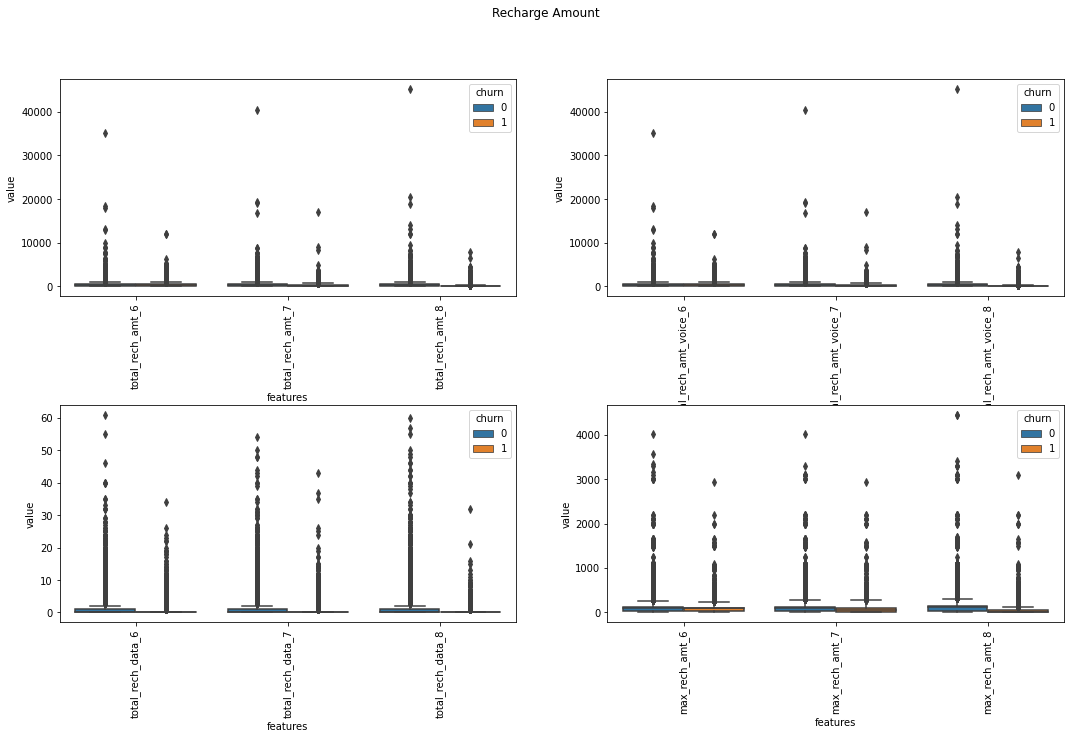

In [49]:
data['total_rech_amt_voice_6'] = np.where((data['total_rech_amt_6'] >= data['total_rech_data_6']), (data['total_rech_amt_6'] - data['total_rech_data_6']), 0)
data['total_rech_amt_voice_7'] = np.where((data['total_rech_amt_7'] >= data['total_rech_data_7']), (data['total_rech_amt_7'] - data['total_rech_data_7']), 0)
data['total_rech_amt_voice_8'] = np.where((data['total_rech_amt_8'] >= data['total_rech_data_8']), (data['total_rech_amt_8'] - data['total_rech_data_8']), 0)

cols = [
        ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],
        ['total_rech_amt_voice_6','total_rech_amt_voice_7','total_rech_amt_voice_8'],
        ['total_rech_data_6','total_rech_data_7','total_rech_data_8'],
        ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']
       ]

# column description stats
for i in range(0,4):
    display(data[cols[i]].describe())

# plot for the recharge amount columns
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(0,4):
    plt.subplot(2,2,i+1)
    X = pd.concat([data[cols[i]], data['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Recharge Amount')

# OUTLIER TREATMENT

In [50]:
#These columns donot have outliers thats why we will exclude these columns while removing the outliers.
cols_to_exclude = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                   'fb_user_6','fb_user_7','fb_user_8',
                   'monthly_2g_6','monthly_2g_7','monthly_2g_8',
                   'monthly_3g_6','monthly_3g_7','monthly_3g_8',
                   'sachet_2g_6','sachet_2g_7','sachet_2g_8',
                   'sachet_3g_6','sachet_3g_7','sachet_3g_8',
                   'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                   'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_og_mou_6','og_others_6','spl_og_mou_7','og_others_7','spl_og_mou_8','og_others_8',
                   'loc_og_t2c_mou_6','std_og_t2f_mou_6','std_ic_t2f_mou_6','loc_ic_t2f_mou_6',
                   'loc_og_t2c_mou_7','std_og_t2f_mou_7','std_ic_t2f_mou_7','loc_ic_t2f_mou_7',
                   'loc_og_t2c_mou_8','std_og_t2f_mou_8','std_ic_t2f_mou_8','loc_ic_t2f_mou_8',
                   'aon','churn'
                  ]

In [51]:
cols = list(set(data.columns).difference(set(cols_to_exclude)))

# iterate through the columns and cap the values with the 99th percentile
for col in cols:
    percentiles = data[col].quantile([0.01,0.99]).values
    data[col][data[col] >= percentiles[1]] = percentiles[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


we have capped the outliers at the 99th percentile

# FEATURE ENGINEERING

Here we are dealing with date columns ,we are tarnsforming date columns into date datatype

In [52]:
# Convert date columns to date format
for col in date_cols:
    #print(col)
    data[col] = pd.to_datetime(data[col], format='%m/%d/%Y')

To get the recent recharge date ,we will find the last recharge date of august month

In [53]:
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
# get the recent date of recharge in the last 3 months
data['last_rech_date'] = data[cols].max(axis=1)
data['last_rech_date']

0       2014-08-08
1       2014-08-28
2       2014-08-14
3       2014-08-31
4       2014-08-09
           ...    
99994   2014-08-26
99995   2014-08-24
99996   2014-07-26
99997   2014-08-20
99998   2014-06-16
Name: last_rech_date, Length: 99999, dtype: datetime64[ns]

number of days between the last recharge and last date of month

DataFrame.astype() method is used to cast a pandas object to a specified dtype. 
Timedelta is a subclass of datetime.timedelta, and behaves in a similar manner, 
but allows compatibility with np.timedelta64 types as well as a host of custom representation, parsing, and attributes.

In [54]:
# get the number of days from the recent recharge date till the last date of august month
data['days_since_last_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - data['last_rech_date'] ).astype('timedelta64[D]'))
# fill the null values as 0
data['days_since_last_rech'] = data['days_since_last_rech'].fillna(0)

To find the weighatge of each row ,we will subtract null values from length of columns
and drop the unwanted columns 

In [55]:
# subtract it from 3 to add higher weightage for values present in all the columns. 
# len(cols) = 3,  means present in all columns, 0 means not present in any column
data['rech_weightage'] = len(cols) - (data[cols].isnull().sum(axis=1))
data.drop(['last_rech_date','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)


Same process done with data columns as done with recharge columns

In [56]:
cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
# get the recent date of recharge data in the last 3 months
data['last_rech_data_date'] = data[cols].max(axis=1)
# get the number of days from the recent recharge data date till the last date of august month
data['days_since_last_data_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - data['last_rech_data_date'] ).astype('timedelta64[D]'))
# fill the null values as 0
data['days_since_last_data_rech'] = data['days_since_last_data_rech'].fillna(0)

# subtract it from 3 to add higher weightage for values present in all the columns. 
# len(cols) = 3, means present in all columns, 0 means not present in any column
data['rech_data_weightage'] = len(cols) - (data[cols].isnull().sum(axis=1))

# drop the unwanted columns
data.drop(['last_rech_data_date','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)

# NUMERICAL COLUMNS-CALLS

to find the means of onnet and offnet columns

In [57]:
# network columns
# get the mean of onnet mou in the last 3 months
cols = ['onnet_mou_6','onnet_mou_7','onnet_mou_8']
data['mean_onnet_mou'] = round(data[cols].mean(axis=1),2)

# get the mean of offnet mou in the last 3 months
cols = ['offnet_mou_6','offnet_mou_7','offnet_mou_8']
data['mean_offnet_mou'] = round(data[cols].mean(axis=1),2)

# get the mean total of both onnet and offnet mou in the last 3 months
data['mean_onnet_offnet_mou'] = data['mean_onnet_mou'] + data['mean_offnet_mou']

extraction of mean of roaming columns for last 3months

In [58]:
# Roaming columns
# get the mean of roam ic mou in the last 3 months
cols = ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
data['mean_roam_ic_mou'] = round(data[cols].mean(axis=1),2)

# get the mean of roam og mou in the last 3 months
cols = ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']
data['mean_roam_og_mou'] = round(data[cols].mean(axis=1),2)

# get the mean total of both roam ic and og mou in the last 3 months
data['mean_roam_mou'] = data['mean_roam_ic_mou'] + data['mean_roam_og_mou']

In [59]:
# loc-t2t columns
cols = ['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8']
data['mean_loc_ic_t2t_mou'] = round(data[cols].mean(axis=1),2)

cols = ['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8']
data['mean_loc_og_t2t_mou'] = round(data[cols].mean(axis=1),2)

data['mean_loc_t2t_mou'] = data['mean_loc_ic_t2t_mou'] + data['mean_loc_og_t2t_mou']

In [60]:
# loc-t2m columns
cols = ['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8']
data['mean_loc_ic_t2m_mou'] = round(data[cols].mean(axis=1),2)

cols = ['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8']
data['mean_loc_og_t2m_mou'] = round(data[cols].mean(axis=1),2)

data['mean_loc_t2m_mou'] = data['mean_loc_ic_t2m_mou'] + data['mean_loc_og_t2m_mou']

In [61]:
# loc-t2f columns
cols = ['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8']
data['mean_loc_ic_t2f_mou'] = round(data[cols].mean(axis=1),2)

cols = ['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8']
data['mean_loc_og_t2f_mou'] = round(data[cols].mean(axis=1),2)

data['mean_loc_t2f_mou'] = data['mean_loc_ic_t2f_mou'] + data['mean_loc_og_t2f_mou']

In [62]:
# loc-t2c columns
cols = ['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']
data['mean_loc_og_t2c_mou'] = round(data[cols].mean(axis=1),2)

In [63]:
# std-t2m columns
cols = ['std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8']
data['mean_std_ic_t2m_mou'] = round(data[cols].mean(axis=1),2)

cols = ['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8']
data['mean_std_og_t2m_mou'] = round(data[cols].mean(axis=1),2)

data['mean_std_t2m_mou'] = data['mean_std_ic_t2m_mou'] + data['mean_std_og_t2m_mou']

In [64]:
# std-t2f columns
cols = ['std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8']
data['mean_std_ic_t2f_mou'] = round(data[cols].mean(axis=1),2)

cols = ['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8']
data['mean_std_og_t2f_mou'] = round(data[cols].mean(axis=1),2)

data['mean_std_t2f_mou'] = data['mean_std_ic_t2f_mou'] + data['mean_std_og_t2f_mou']

In [65]:
# loc columns
cols = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']
data['mean_loc_ic_mou'] = round(data[cols].mean(axis=1),2)

cols = ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']
data['mean_loc_og_mou'] = round(data[cols].mean(axis=1),2)

data['mean_loc_mou'] = data['mean_loc_ic_mou'] + data['mean_loc_og_mou']

In [66]:
# std columns
cols = ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']
data['mean_std_ic_mou'] = round(data[cols].mean(axis=1),2)

cols = ['std_og_mou_6','std_og_mou_7','std_og_mou_8']
data['mean_std_og_mou'] = round(data[cols].mean(axis=1),2)

data['mean_std_mou'] = data['mean_std_ic_mou'] + data['mean_std_og_mou']

In [67]:
# isd columns
cols = ['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8']
data['mean_isd_ic_mou'] = round(data[cols].mean(axis=1),2)

cols = ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']
data['mean_isd_og_mou'] = round(data[cols].mean(axis=1),2)

data['mean_isd_mou'] = data['mean_isd_ic_mou'] + data['mean_isd_og_mou']


In [68]:
# spl columns
cols = ['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8']
data['mean_spl_ic_mou'] = round(data[cols].mean(axis=1),2)

cols = ['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8']
data['mean_spl_og_mou'] = round(data[cols].mean(axis=1),2)

data['mean_spl_mou'] = data['mean_spl_ic_mou'] + data['mean_spl_og_mou']

In [69]:
# spl columns
cols = ['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8']
data['mean_spl_ic_mou'] = round(data[cols].mean(axis=1),2)

cols = ['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8']
data['mean_spl_og_mou'] = round(data[cols].mean(axis=1),2)

data['mean_spl_mou'] = data['mean_spl_ic_mou'] + data['mean_spl_og_mou']

In [70]:
# total columns
cols = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
data['mean_total_ic_mou'] = round(data[cols].mean(axis=1),2)
# Weightage for ic for the last 3 months
df = data[cols].astype(bool)
data['total_ic_weightage'] = ( df['total_ic_mou_6'] * 1 ) + ( df['total_ic_mou_7'] * 10 ) + ( df['total_ic_mou_8'] * 100 )

cols = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
data['mean_total_og_mou'] = round(data[cols].mean(axis=1),2)
# Weightage for og for the last 3 months
df = data[cols].astype(bool)
data['total_og_weightage'] = ( df['total_og_mou_6'] * 1 ) + ( df['total_og_mou_7'] * 10 ) + ( df['total_og_mou_8'] * 100 )

data['mean_total_mou'] = data['mean_total_ic_mou'] + data['mean_total_og_mou']

data['mean_total_mou_6'] = round(data[['total_ic_mou_6','total_og_mou_6']].mean(axis=1),2)
data['mean_total_mou_7'] = round(data[['total_ic_mou_7','total_og_mou_7']].mean(axis=1),2)
data['mean_total_mou_8'] = round(data[['total_ic_mou_8','total_og_mou_8']].mean(axis=1),2)

# Numeric Columns - Recharge


In [71]:
# total_rech_num columns
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
# mean of total recharge number
data['mean_total_rech_num'] = round(data[cols].mean(axis=1),2)
# Minimum of total recharge number
data['min_total_rech_num'] = data[cols].min(axis=1)
# Maximum of total recharge number
data['max_total_rech_num'] = data[cols].max(axis=1)

In [72]:

#total_rech_amt columns

cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
data['mean_total_rech_amt'] = round(data[cols].mean(axis=1),2)
data['min_total_rech_amt'] = data[cols].min(axis=1)
data['max_total_rech_amt'] = data[cols].max(axis=1)

In [73]:
# max_rech_amt columns
cols = ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']
data['mean_max_rech_amt'] = round(data[cols].mean(axis=1),2)

# last_day_rch_amt columns
cols = ['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
data['mean_last_day_rch_amt'] = round(data[cols].mean(axis=1),2)

In [74]:
# total_rech_data columns
cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8']
data['mean_total_rech_data'] = round(data[cols].mean(axis=1),2)
data['min_total_rech_data'] = data[cols].min(axis=1)
data['max_total_rech_data'] = data[cols].max(axis=1)

In [75]:
# total_rech_amt_data columns
cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8']
data['mean_total_rech_amt_data'] = round(data[cols].mean(axis=1),2)
data['min_total_rech_amt_data'] = data[cols].min(axis=1)
data['max_total_rech_amt_data'] = data[cols].max(axis=1)

In [76]:
# total_rech_voice columns
data['mean_total_rech_voice'] = data['mean_total_rech_num'] - data['mean_total_rech_data']
data['min_total_rech_voice'] = data['min_total_rech_num'] - data['min_total_rech_data']
data['max_total_rech_voice'] = data['max_total_rech_num'] - data['max_total_rech_data']

In [77]:
# total_rech_amt_voice columns
data['mean_total_rech_amt_voice'] = data['mean_total_rech_amt'] - data['mean_total_rech_amt_data']
data['min_total_rech_amt_voice'] = data['min_total_rech_amt'] - data['min_total_rech_amt_data']
data['max_total_rech_amt_voice'] = data['max_total_rech_amt'] - data['max_total_rech_amt_data']

In [78]:
# max_rech_data columns
cols = ['max_rech_data_6','max_rech_data_7','max_rech_data_8']
data['mean_max_rech_data'] = round(data[cols].mean(axis=1),2)

# count_rech_2g columns
cols = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8']
data['mean_count_rech_2g'] = round(data[cols].mean(axis=1),2)

# count_rech_3g columns
cols = ['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']
data['mean_count_rech_3g'] = round(data[cols].mean(axis=1),2)

In [79]:
#get recharge num weightage for the last three months
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
df = data[cols].astype(bool)
data['rech_num_weightage'] = ( df['total_rech_num_6'] * 1 ) + ( df['total_rech_num_7'] * 10 ) + ( df['total_rech_num_8'] * 100 )

In [80]:
#get recharge amount weightage for the last three months
cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
df = data[cols].astype(bool)
data['rech_amt_weightage'] = ( df['total_rech_amt_6'] * 1 ) + ( df['total_rech_amt_7'] * 10 ) + ( df['total_rech_amt_8'] * 100 )

In [81]:
# arpu columns
# ARPU = Total Revenue / Average Subscribers
cols = ['arpu_6','arpu_7','arpu_8']
data['mean_arpu'] = round(data[cols].mean(axis=1),2)

cols = ['arpu_2g_6','arpu_2g_7','arpu_2g_8']
data['mean_arpu_2g_data'] = round(data[cols].mean(axis=1),2)

cols = ['arpu_3g_6','arpu_3g_7','arpu_3g_8']
data['mean_arpu_3g_data'] = round(data[cols].mean(axis=1),2)

cols = ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']
data['mean_vol_2g_mb_data'] = round(data[cols].mean(axis=1),2)

cols = ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
data['mean_vol_3g_mb_data'] = round(data[cols].mean(axis=1),2)


In [82]:
#get night_pck_user weightage for the last three months
cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8']
data['night_pck_weightage'] = ( data['night_pck_user_6'] * 1 ) + ( data['night_pck_user_7'] * 10 ) + ( data['night_pck_user_8'] * 100 )

In [83]:
#get fb_user weightage for the last three months
cols = ['fb_user_6','fb_user_7','fb_user_8']
data['fb_user_weightage'] = ( data['fb_user_6'] * 1 ) + ( data['fb_user_7'] * 10 ) + ( data['fb_user_8'] * 100 )

In [84]:
#get vbc mean for the last three months
cols = ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']
data['mean_vbc_3g'] = round(data[cols].mean(axis=1),2)

In [85]:
#get monthly pack weightage for the last three months
data['monthly_2g_weightage'] = ( data['monthly_2g_6'] * 1 ) + ( data['monthly_2g_7'] * 10 ) + ( data['monthly_2g_8'] * 100 )
data['monthly_3g_weightage'] = ( data['monthly_3g_6'] * 1 ) + ( data['monthly_3g_7'] * 10 ) + ( data['monthly_3g_8'] * 100 )

#get sachet pack weightage for the last three months
data['sachet_2g_weightage'] = ( data['sachet_2g_6'] * 1 ) + ( data['sachet_2g_7'] * 10 ) + ( data['sachet_2g_8'] * 100 )
data['sachet_3g_weightage'] = ( data['sachet_3g_6'] * 1 ) + ( data['sachet_3g_7'] * 10 ) + ( data['sachet_3g_8'] * 100 )

# MODEL1 CUSTOMER CHURN PREDICTION

# Feature Selection and Dimensionality Reuction Using PCA

In [86]:
#copy of dataframe
master_df=data.copy()

seperating the category columns for encoding

In [87]:
# prepare the dataset
#seperating the target variable
churn = data['churn']
data = data.drop('churn', axis=1)

#split the columns into category and numerical
cat_cols = ['night_pck_user_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','fb_user_6',
            'night_pck_user_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7','fb_user_7',
            'night_pck_user_8','monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8','fb_user_8'] 

num_cols = list(set(data.columns).difference(set(cat_cols)))

In [88]:
# dummy encode the categorical columns
data = pd.concat([data,pd.get_dummies(data[cat_cols], drop_first=True)], axis=1)

# drop the original columns
data.drop(cat_cols, axis=1, inplace=True)

In [89]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

log transform is a function transformer.
In log transform,log is taken on each every data element.log cant be taken for negative values.log transformation applied on right skewed data i.e. positively skewed  data will make the data at centre that means it will try to normalize the data.log transofrm will try to convert the additive scale to multiplicative scale.

As data is right skewed Hence we are using satandard scalar so that mean=0 and sd=1

In [90]:
data[num_cols] = np.log((10000 + data[num_cols]))
data = np.log((10000 + data))

standard scalar includes the mean centring and scaling by the factor of standard deviation
mean=0 and sd=1

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)

# transform train and test sets
data_scaled = scaler.transform(data)


In [92]:
# Check for missing values count
#data = data.replace([np.inf, -np.inf], np.nan)
df = data.isnull().sum().reset_index(name='missing_cnt')
df.loc[df['missing_cnt']>0].sort_values('missing_cnt', ascending=False)

,index,missing_cnt


# AS WE KNOW THAT THERE IS CLASS IMBALANCE IN OUR DATA HENCE TO HANDLE CLASS IMBALANCING USING SMOTE OR ADASYN

In [93]:
#install to handle class imbalance

!pip install imbalanced-learn


Imbalance data can result in the biased predictions.Therfore,analysis is done by remove this imbalancing from the datasets.

Methods to handle class imabalance are:
1.)Under Sampling
2.)Over Sampling
     i)SMOTE---SYTHETIC MINORITY OVER SAMPLING TECHNIQUE
     ii)ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning.

WE WILL PREFER ADASYN AS SMOTE INTRODUCES MORE NOISE TO THE DATASETS

In [94]:
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

In [95]:
X = data
Y = churn

#smote = SMOTE(random_state=RANDOM_STATE, ratio=1.0)
#X, Y = smote.fit_sample(X, Y)

adasyn = ADASYN(random_state=RANDOM_STATE)
X, Y = adasyn.fit_resample(X, Y)

print('Class Balance count : ',Counter(Y))

Class Balance count :  Counter({0: 89808, 1: 87346})


class in balanced now,we can do the train test split

# TRAIN TEST SPLIT

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(124007, 219) (124007,)
(53147, 219) (53147,)


# PCA(FOR DIMENSIONALITY REDUCTION)

Let's apply PCA on the training dataset for dimensionality reduction and feature selection.
SVD is another decomposition method for both real and complex matrices. It decomposes a matrix into the product of two unitary matrices (U, V*) and a rectangular diagonal matrix of singular values

In [97]:
#initialize the pca with randomized
pca = PCA(svd_solver='randomized', random_state=RANDOM_STATE)
# fit the training dataset
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

Draw the screeplot for the PCA components and pick the right number of PC components to build the model
explained_variance_ratio_ method of PCA is used to get the ration of variance (eigenvalue / total eigenvalues) 

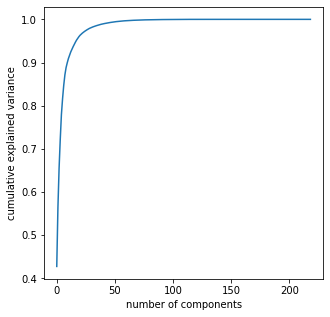

In [98]:
#Screeplot for the PCA components
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


There is more  variations in 50 features.So,These are used as principal components.

In [99]:
# Initialize pca with 50 components
pca = PCA(n_components=50, random_state=RANDOM_STATE)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train)
# transform the testing dataset
X_test_pca = pca.transform(X_test)
# fit and transform the whole dataset
X_pca = pca.fit_transform(X)

# BASELINE MODEL BUILDING

In [100]:
model_score_list = []


In [101]:
'''
Method Name : evaluate_model
Input(s)    : 2 series
Output(s)   : 4 float values  
Description :
- This method gets 2 series (actual and predicted) as inputs and compute the accuracy, ROC, Precision and Recall scores  
- Then returns the computed scores. 
`'''
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)
    #F1 Score
    F1_score=round(f1_score(actual,pred)*100,2)
    print('F1 score : ', F1_score)


    return acc_score, roc_score, prec_score, rec_score,F1_score
    


# LOGISTIC REGRESSION
Logistic regression models a relationship between predictor variables and a categorical response variable.
Logistic regression helps us to estimate a probability of falling into a certain level of the categorical response given a set of predictors.

In [102]:

# Initialize the Logistic regression
model = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the testing pca data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score,F1_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score,'F1_score':F1_score})


Accuracy Score :  67.27
ROC AUC score :  67.38
Precision score :  63.69
Recall score :  78.99
F1 score :  70.52


# RIDGE CLASSIFIER
This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case).



In [103]:
# initialize the Ridge Classifier
model = RidgeClassifier(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score,F1_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RidgeClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score,'F1_score':F1_score})

Accuracy Score :  67.27
ROC AUC score :  67.38
Precision score :  63.69
Recall score :  78.99
F1 score :  70.52


#RandomForestClassifier

In [104]:
# initialize the randomforest
model = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score,F1_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score,'F1_score':F1_score})

Accuracy Score :  57.69
ROC AUC score :  58.06
Precision score :  53.97
Recall score :  99.27
F1 score :  69.93


# EXTRA TREES
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

In [105]:
# initialize the ExtraTreesClassifier
model = ExtraTreesClassifier(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score,F1_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'ExtraTreesClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score,'F1_score':F1_score})


Accuracy Score :  96.03
ROC AUC score :  96.04
Precision score :  95.56
Recall score :  96.48
F1 score :  96.02


#XGBoost Classifier

In [106]:
# initialize the XGBoostClassifier
model = XGBClassifier(objective='binary:logistic')
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score,F1_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'XGBClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score,'F1_score':F1_score})


Accuracy Score :  83.58
ROC AUC score :  83.54
Precision score :  86.22
Recall score :  79.57
F1 score :  82.77


In [107]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score','F1_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['F1_score','recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score,F1_score
3,ExtraTreesClassifier,96.03,96.04,95.56,96.48,96.02
4,XGBClassifier,83.58,83.54,86.22,79.57,82.77
0,LogisticRegression,67.27,67.38,63.69,78.99,70.52
1,RidgeClassifier,67.27,67.38,63.69,78.99,70.52
2,RandomForestClassifier,57.69,58.06,53.97,99.27,69.93


## TOP 2 MODELS BASED ON THE BASIC OF F1 SCORE AND RECALL SCORE
#####ExtraTreesClassifier
#####XGBClassifier


## LETS CHECK OVERFITTING FOR TOP 2 MODELS USING CROSS VALIDATION AND SELECT A MODEL

### CROSS VALIDATION FOR TOP 2 MODELS AND MODEL SELECTION

SELECT THE TOP MODEL FROM THE BEST 2 MODELS ON THE BASES OF MEAN SCORE

cross_val_score returns score of test fold.For the cross_val_score() , you are using the average of the output, which will be affected by the number of folds because then it may have some folds which may have high error (not fit correctly).

In [108]:
# Cross validation for ExtraTreesClassifier
# initialize Stratified KFold with 5 splits
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state = RANDOM_STATE)
model = ExtraTreesClassifier(random_state=RANDOM_STATE)
etc_cv_scores = cross_val_score(model, X_pca, Y, scoring='recall', cv = skf, n_jobs=-1)
print('ExtraTreesClassifier cv_score_mean : ', round(etc_cv_scores.mean() * 100, 2))
print('ExtraTreesClassifier cv_score_std : ', round(etc_cv_scores.std() * 100, 2))

ExtraTreesClassifier cv_score_mean :  96.9
ExtraTreesClassifier cv_score_std :  0.17


In [114]:
# Cross validation for XGBClassifie
from sklearn.model_selection import KFold
model = XGBClassifier(objective='binary:logistic')
kfold = KFold(n_splits=n_splits, random_state=RANDOM_STATE,shuffle=True)
xgbc_cv_scores = cross_val_score(model, X_pca, Y, scoring='recall',cv=kfold)
print('XGBClassifier cv_score_mean : ', round(etc_cv_scores.mean() * 100, 2))
print('XGBClassifier cv_score_std : ', round(etc_cv_scores.std() * 100, 2))


XGBClassifier cv_score_mean :  96.9
XGBClassifier cv_score_std :  0.17


# Plot the cvscores for top 2 models

The NumPy linspace function (sometimes called np.linspace) is a tool in Python for creating numeric sequences.
start,stop and num paramters will be given in linespace function.

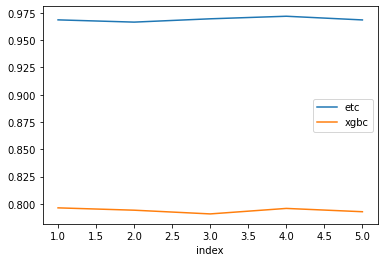

In [115]:
# plot the cv scores for the above 2 models
cv_scores_df = pd.DataFrame({'index':np.linspace(1,n_splits,n_splits), 'etc':etc_cv_scores, 'xgbc':xgbc_cv_scores})
cv_scores_df.plot.line(x='index', y=['etc','xgbc'])


#Hypertunning For Extra Trees Classifier


In [116]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators':[10,50,100],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,3]
}

In [117]:
model = ExtraTreesClassifier()
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,verbose=3,random_state=RANDOM_STATE)

In [118]:
grid.fit(X_train_pca,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.947 total time=  28.4s
[CV 2/5] END min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.947 total time=  28.0s
[CV 3/5] END min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.947 total time=  27.7s
[CV 4/5] END min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.948 total time=  27.8s
[CV 5/5] END min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.950 total time=  27.6s
[CV 1/5] END min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.945 total time=  14.4s
[CV 2/5] END min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.944 total time=  14.3s
[CV 3/5] END min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.944 total time=  14.6s
[CV 4/5] END min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.944 total time=  14.3s
[CV 5/5

RandomizedSearchCV(estimator=ExtraTreesClassifier(),
                   param_distributions={'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 50, 100]},
                   random_state=42, verbose=3)

In [119]:
grid.best_params_


{'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}

# Fitting the best estimator

##ExtraTreesClassifier with best estimator

In [120]:
# initialize the ExtraTreesClassifier
etc_model = ExtraTreesClassifier(min_samples_leaf= 1, min_samples_split = 6, n_estimators = 100)
# fit the pca training data
etc_model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = etc_model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score,F1_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'ExtraTreesClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score,'F1_score':F1_score})

Accuracy Score :  95.53
ROC AUC score :  95.53
Precision score :  95.26
Recall score :  95.74
F1 score :  95.5


# MODEL EVALUATION

plt.xlim() function used to give limits in x-axes.
In plt.legend() function,The elements to be added to the legend are automatically determined, when you do not pass in any extra arguments.
roc_curve() function returns fpr,tpr and thresholds and drop_intermediate is used to check Whether to drop some suboptimal thresholds which would not appear on a plotted ROC curve. This is useful in order to create lighter ROC curves.

roc_auc_score() Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
auc----area under the curve
plot() function is used to plot a line from one point to another point.



In [121]:
'''
Method Name : draw_roc
Input(s)    : 2 Series
Output(s)   : None  
Description :
- This method reads the Actual and predicted series of values
- Compute the roc_auc values
- Compute the roc_auc_score 
- Then plot the roc_auc curve. 
'''
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

sklearn.metrics.confusion_matrix(y_actual, y_predict) to extract tn, fp, fn, tp.

In [122]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(Y_test, Y_pred))

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# Model evaluation
acc_score, roc_score, prec_score, rec_score, F1_score = evaluate_model(Y_test, Y_pred)


Classification Report : 

               precision    recall  f1-score   support

           0       0.96      0.95      0.96     26813
           1       0.95      0.96      0.95     26334

    accuracy                           0.96     53147
   macro avg       0.96      0.96      0.96     53147
weighted avg       0.96      0.96      0.96     53147


TN = 25559, FP = 1254, FN = 1123, TP = 25211


Accuracy Score :  95.53
ROC AUC score :  95.53
Precision score :  95.26
Recall score :  95.74
F1 score :  95.5


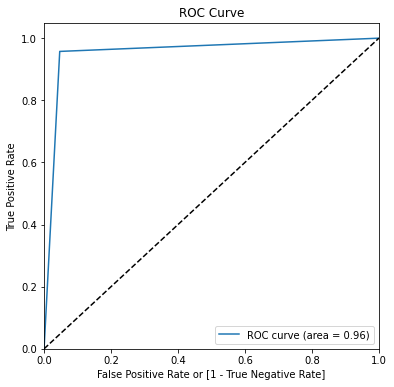

In [123]:
# ROC-AUC curve
draw_roc(Y_test, Y_pred)

# Observation

We have got the recall score 99.59% which is slightyly better than recall with cross validation.
we have  109 churned customers predicted as non churned and 4910 non churned customer predicted as churned.
We can increase the recall score by changing the probability cutoff.
Roc Curve seems to be in a good shape.

In [124]:
master_df.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,mean_arpu_3g_data,mean_vol_2g_mb_data,mean_vol_3g_mb_data,night_pck_weightage,fb_user_weightage,mean_vbc_3g,monthly_2g_weightage,monthly_3g_weightage,sachet_2g_weightage,sachet_3g_weightage
0,197.385,214.816,213.80300,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,212.17,12.40,114.65,0.0,111.0,43.87,0,111,0,0
1,34.047,355.074,268.32100,24.11,78.68,7.68,15.74,99.84,304.76,0.00,...,0.00,157.85,0.00,2.0,112.0,0.00,10,0,200,0
2,167.690,189.058,210.22600,11.54,55.24,37.26,143.33,220.59,208.36,0.00,...,0.00,0.00,0.00,222.0,222.0,1.39,0,0,0,0
3,221.338,251.102,508.05400,99.91,54.39,310.98,123.31,109.01,71.68,0.00,...,0.00,0.00,0.00,222.0,222.0,0.00,0,0,0,0
4,261.636,309.876,238.17400,50.31,149.44,83.89,76.96,91.88,124.26,0.00,...,0.00,0.00,0.00,220.0,220.0,0.00,0,0,1,0
5,50.258,58.810,83.38600,50.16,43.63,85.48,19.28,13.44,14.46,0.00,...,0.00,0.00,0.00,222.0,222.0,0.00,0,0,0,0
6,429.023,190.704,255.11400,71.03,45.03,76.66,262.73,49.24,92.08,0.00,...,0.00,0.00,0.00,222.0,222.0,0.00,0,0,0,0
7,1069.180,1349.850,1455.53996,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.00,0.00,0.00,222.0,222.0,31.95,0,0,0,0
8,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,6.61,118.68,254.30,2.0,112.0,351.28,10,0,310,0
9,119.518,247.435,170.23100,33.89,30.11,22.43,63.48,54.16,78.34,0.00,...,0.00,2.46,0.00,202.0,212.0,0.00,10,0,0,0


# Identifying the Strong Predictors of churn(Important Features)

In [125]:
# Get the copy of the master_df and assign it in the dataset
data = master_df.copy()

churn = data['churn']
data = data.drop('churn', axis=1)

X = data
Y = churn

In [126]:
data.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'mean_arpu_3g_data', 'mean_vol_2g_mb_data', 'mean_vol_3g_mb_data',
       'night_pck_weightage', 'fb_user_weightage', 'mean_vbc_3g',
       'monthly_2g_weightage', 'monthly_3g_weightage', 'sachet_2g_weightage',
       'sachet_3g_weightage'],
      dtype='object', length=237)

In [127]:
# Fit the ExtraTreesClassifier model with default params
model = ExtraTreesClassifier(n_jobs=-1, random_state=RANDOM_STATE)
model.fit(X, Y)

# Check the feature importance score for each feature
feature_imp_df = pd.DataFrame({'Feature':data.columns, 'Score':model.feature_importances_})
# Order the features by max score
feature_imp_df = feature_imp_df.sort_values('Score', ascending=False).reset_index()
feature_imp_df.head(50)


,index,Feature,Score
0,193,total_ic_weightage,0.138129
1,195,total_og_weightage,0.086648
2,224,rech_amt_weightage,0.046785
3,223,rech_num_weightage,0.015455
4,80,total_ic_mou_8,0.014081
5,199,mean_total_mou_8,0.011561
6,154,days_since_last_rech,0.011411
7,59,loc_ic_t2m_mou_8,0.011049
8,65,loc_ic_mou_8,0.010685
9,155,rech_weightage,0.009839


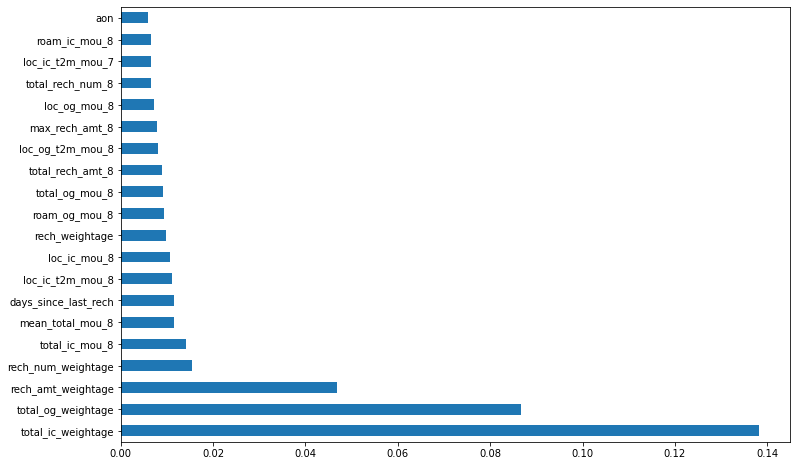

In [128]:
#plot graph of feature importance for better visualization

plt.figure(figsize = (12,8))
feat_importance = pd.Series(model.feature_importances_,index=data.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [129]:
cols = ['total_og_weightage','max_rech_amt_8','days_since_last_rech','loc_og_t2m_mou_8','roam_og_mou_8',
        'total_og_mou_8','total_rech_num_8','arpu_8','fb_user_weightage','aon']

X = data[cols]
Y = churn

# fit the data in GLM model
logm = sm.GLM(Y,(sm.add_constant(X)), family = sm.families.Binomial())
modres = logm.fit()
# print the summary results
logm.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                99999
Model:                            GLM   Df Residuals:                    99988
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20309.
Date:                Fri, 08 Apr 2022   Deviance:                       40618.
Time:                        10:41:48   Pearson chi2:                 1.55e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2915      0.088    -14.627      0.000      -1.464      -1.118
total_og_weightage      -0.0255      0.000    -81.205      0.000      -0.026      -0.025
max_rech_amt_8          -0.0030      0.000    -12.670      0.000      -0.003      -0.003
days_since_last_rech     0.0275      0.001     23.696      0.000       0.025       0.030
loc_og_t2m_mou_8        -0.0057      0.000    -17.130      0.000      -0.006      -0.005
roam_og_mou_8            0.0079      0.000     19.185      0.000       0.007       0.009
total_og_mou_8        6.655e-05   7.26e-05      0.917      0.359   -7.57e-05       0.000
total_rech_num_8        -0.0327      0.004     -8.114      0.000      -0.041      -0.025
arpu_8                   0.0005      0.000      3.256      0.001       0.000       0.001
fb_user_weightage        0.0092      0.000     23.507      0.000       0.008       0.010
aon                     -0.0004   1.81e-05    -23.605      0.000      -0.000      -0.000
========================================================================================
"""

In [130]:
#selected features with less p-value
cols = ['total_og_weightage','max_rech_amt_8','days_since_last_rech','loc_og_t2m_mou_8','roam_og_mou_8',
        'total_rech_num_8','arpu_8','fb_user_weightage','aon']
data = data[cols]

In [131]:
data.columns

Index(['total_og_weightage', 'max_rech_amt_8', 'days_since_last_rech',
       'loc_og_t2m_mou_8', 'roam_og_mou_8', 'total_rech_num_8', 'arpu_8',
       'fb_user_weightage', 'aon'],
      dtype='object')

In [132]:

data.dtypes



total_og_weightage        int64
max_rech_amt_8            int64
days_since_last_rech    float64
loc_og_t2m_mou_8        float64
roam_og_mou_8           float64
total_rech_num_8          int64
arpu_8                  float64
fb_user_weightage       float64
aon                       int64
dtype: object

In [133]:
data.head(5)

,total_og_weightage,max_rech_amt_8,days_since_last_rech,loc_og_t2m_mou_8,roam_og_mou_8,total_rech_num_8,arpu_8,fb_user_weightage,aon
0,0,252,23.0,0.00,0.00,2,213.803,111.0,968
1,111,65,3.0,291.86,0.00,11,268.321,112.0,1006
2,111,86,17.0,38.46,0.00,2,210.226,222.0,1103
3,111,50,0.0,22.46,39.04,18,508.054,222.0,2491
4,111,110,22.0,124.26,0.00,3,238.174,220.0,1526


In [134]:
# Prepare the data
X = data
Y = churn

# Handle class imbalance
#smote = SMOTE(random_state=RANDOM_STATE, ratio=1.0)
#X, Y = smote.fit_sample(X, Y)

adasyn = ADASYN(random_state=RANDOM_STATE)
X, Y = adasyn.fit_resample(X, Y)

print('Class Balance count : ',Counter(Y))

Class Balance count :  Counter({1: 90078, 0: 89808})


##Split into train test

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(125920, 9) (125920,)
(53966, 9) (53966,)


In [136]:
print('Y_train :', Counter(Y_train))
print('Y_test :', Counter(Y_test))

Y_train : Counter({0: 62982, 1: 62938})
Y_test : Counter({1: 27140, 0: 26826})


#Model Building

In [137]:
model = ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='gini', max_depth=60, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, 
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1, oob_score=False, random_state=RANDOM_STATE, verbose=0, warm_start=False)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

##Model Evaluation

In [138]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(Y_test, Y_pred))

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# Model evaluation
acc_score, roc_score, prec_score, rec_score,F1_score= evaluate_model(Y_test, Y_pred)


Classification Report : 

               precision    recall  f1-score   support

           0       0.97      0.94      0.96     26826
           1       0.94      0.97      0.96     27140

    accuracy                           0.96     53966
   macro avg       0.96      0.96      0.96     53966
weighted avg       0.96      0.96      0.96     53966


TN = 25228, FP = 1598, FN = 756, TP = 26384


Accuracy Score :  95.64
ROC AUC score :  95.63
Precision score :  94.29
Recall score :  97.21
F1 score :  95.73


##Save Model

In [140]:
import pickle
file = 'etc_model.pkl'
pickle.dump(model,open(file, 'wb'))


In [141]:
load_model = pickle.load(open(file, 'rb'))

In [142]:
y_pred = load_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [149]:
confusion = confusion_matrix(Y_test, y_pred)
confusion

array([[25228,  1598],
       [  756, 26384]])

(        total_og_weightage  max_rech_amt_8  days_since_last_rech  \
 137268                 111               0              5.000000   
 138908                  11               0              7.000000   
 130960                 108              79              7.191753   
 32673                  111              20              3.000000   
 125841                 111             128              3.401465   
 ...                    ...             ...                   ...   
 49462                  111              50              2.000000   
 178299                  11              14             16.952417   
 76786                  101             100              8.000000   
 116476                 109             255             16.076608   
 168426                 111             110              5.000000   
 
         loc_og_t2m_mou_8  roam_og_mou_8  total_rech_num_8       arpu_8  \
 137268          1.119292       2.963806                 3    25.526456   
 138908          0.0

(        total_og_weightage  max_rech_amt_8  days_since_last_rech  \
 137268                 111               0              5.000000   
 138908                  11               0              7.000000   
 130960                 108              79              7.191753   
 32673                  111              20              3.000000   
 125841                 111             128              3.401465   
 ...                    ...             ...                   ...   
 49462                  111              50              2.000000   
 178299                  11              14             16.952417   
 76786                  101             100              8.000000   
 116476                 109             255             16.076608   
 168426                 111             110              5.000000   
 
         loc_og_t2m_mou_8  roam_og_mou_8  total_rech_num_8       arpu_8  \
 137268          1.119292       2.963806                 3    25.526456   
 138908          0.0